In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
timed_df = pd.read_csv("close_prices.csv")
timed_df.fillna(0, inplace=True)

timed_df['Date'] = pd.to_datetime(timed_df['Date'])
timed_df.set_index('Date', inplace=True)

# Drop columns where every entry is 0.0
timed_df = timed_df.loc[:, (timed_df != 0).any(axis=0)]

# # # Use the column selection to drop columns where less than the threshold number of values are non-zero
threshold = 0.70 * len(timed_df)
timed_df = timed_df.loc[:, (timed_df != 0).sum() >= threshold]

In [3]:
timed_df

,ABB,AEGISLOG,AMARAJABAT,AMBALALSA,ANDHRAPET,ANSALAPI,ARUNAHTEL,BOMDYEING,ASIANHOTNR,ATUL,...,BENGALASM,SUNDARAM,TAMBOLI,KCPSUGIND,KECL,KTIL,ZENTEC,APLAPOLLO,TERASOFT,STEELXIND
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,53.989998,0.000000,0.000000,0.000000,0.000000,0.0,96.300003,14.839999,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2000-01-04,52.599998,0.000000,0.000000,0.000000,0.000000,0.0,96.300003,14.579999,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2000-01-05,52.200001,0.000000,0.000000,0.000000,0.000000,0.0,96.300003,13.799999,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2000-01-06,56.000000,0.000000,0.000000,0.000000,0.000000,0.0,96.300003,14.189999,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2000-01-07,54.000000,0.000000,0.000000,0.000000,0.000000,0.0,96.300003,13.299999,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-06,4132.799805,326.799988,644.150024,40.500000,77.339996,0.0,15.870000,145.449997,139.600006,7027.399902,...,5626.049805,3.44,170.050003,35.900002,126.050003,55.049999,728.250000,1617.050049,46.310001,8.80
2023-10-09,4095.149902,322.700012,634.549988,41.310001,74.269997,14.3,14.930000,141.300003,129.649994,6889.799805,...,5610.049805,3.36,168.300003,36.660000,127.150002,55.000000,709.450012,1572.150024,44.180000,7.98
2023-10-10,4189.149902,323.299988,635.250000,42.130001,74.580002,0.0,15.000000,149.949997,133.500000,6882.899902,...,5645.899902,3.34,178.000000,38.480000,130.899994,52.730000,744.900024,1615.250000,47.060001,8.49


In [4]:
# Assuming timed_df is your DataFrame indexed by date

# Set the desired start and end dates
start_date = '2010-01-05'
end_date = '2019-01-05'

# Use loc to select rows within the specified date range
timed_df = timed_df.loc[start_date:end_date]

# Set the desired number of columns to keep
num_columns_to_keep = 100 #Replace with your desired number

# first num columns
# timed_df = timed_df.iloc[:, :num_columns_to_keep]

# last num columns 
# timed_df = timed_df.iloc[:, -num_columns_to_keep:]

#random num columns
timed_df = timed_df.sample(n=num_columns_to_keep, axis=1)


timed_df.columns

Index(['APOLLOHOSP', 'MMWL', 'SMLISUZU', 'NSIL', 'CENTENKA', 'CAPRO',
       'WEBELSOLAR', 'RICHIRICH', 'WELSPUNIND', 'TRIVENI', 'STERTOOLS',
       'UNIVSTAR', 'VASINFRA', 'NDLVENTURE', 'HPCOTTON', 'PANACEABIO',
       'INDPRUD', 'DECPO', 'UMESLTD', 'ADITYA', 'RELCAPITAL', 'GILLANDERS',
       'APMIN', 'SUNTV', 'BASML', 'ADDIND', 'BERVINL', 'ALBERTDA', 'ZMULTIPU',
       'ZENIFIB', 'DCM', 'TCI', 'INDIANACRY', 'INDSUCR', 'CUBEXTUB', 'IGPL',
       'DVL', 'CANFINHOME', 'ELEFLOR', 'HINDHARD', 'MOHITIND', 'RAMGOPOLY',
       'SOLIDSTON', 'WINSOME', 'UPL', 'JETKINGQ', 'GRASIM', 'BITS', 'ASMTEC',
       'CANBK', 'HESTERBIO', 'EMMESSA', 'ACL', 'PICTUREHS', 'BRIGHTBR',
       'GUFICBIO', 'ALPINEHOU', 'ATLANTA', 'SAREGAMA', 'SAFARIND', 'DHANFAB',
       'VELJAN', 'GTLINFRA', 'SUNSHIEL', 'GREAVESCOT', 'DIVISLAB', 'TRISHAKT',
       'PRAENG', 'PANELEC', 'ALPSINDUS', 'ELPROINTL', 'CAPRIHANS', 'AJMERA',
       'CONTILI', 'VELHO', 'UNICHEMLAB', 'AUSOMENT', 'ALMONDZ', 'ELECTCAST',
       'BGWTATO', 

In [5]:
timed_df

,APOLLOHOSP,MMWL,SMLISUZU,NSIL,CENTENKA,CAPRO,WEBELSOLAR,RICHIRICH,WELSPUNIND,TRIVENI,...,PITTIENG,ASHRAM,KZLFIN,COSMOFE,AMJLAND,BLUECHIPT,ISHITADR,ESCORTS,SABTN,RELINFRA
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,366.649994,1.347891,317.000000,1196.800049,299.500000,51.200001,166.050003,4.72,9.330000,112.400002,...,19.575001,37.75,9.00,10.200000,20.549999,10.660000,10.600000,144.399994,34.049999,1190.400024
2010-01-06,354.049988,1.410462,311.950012,1188.099976,293.549988,51.200001,161.000000,4.95,9.465000,115.199997,...,19.325001,37.75,9.38,10.710000,20.049999,10.400000,10.860000,150.199997,34.900002,1163.000000
2010-01-07,355.149994,1.462605,308.200012,1191.550049,296.899994,51.200001,155.750000,5.16,9.340000,114.199997,...,19.200001,37.75,9.10,11.240000,21.049999,10.300000,10.730000,152.100006,34.950001,1164.300049
2010-01-08,353.725006,1.532998,315.100006,1221.349976,294.299988,51.200001,150.600006,5.40,9.410000,115.699997,...,19.575001,37.75,9.39,11.800000,21.100000,10.800000,10.980000,149.800003,34.250000,1164.500000
2010-01-11,355.075012,1.605998,301.000000,1297.500000,295.399994,51.200001,144.350006,5.79,9.305000,115.300003,...,20.750000,37.75,10.30,11.800000,22.799999,11.340000,10.560000,151.100006,35.450001,1160.849976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,1258.699951,4.450000,662.950012,1152.949951,265.350006,9.500000,28.350000,2.40,59.700001,47.950001,...,72.849998,4.30,13.90,19.350000,20.350000,124.949997,16.110001,706.200012,5.850000,315.750000
2019-01-01,1263.349976,4.400000,672.849976,1157.000000,266.600006,9.500000,29.049999,2.30,60.349998,48.099998,...,72.400002,4.30,13.90,18.549999,20.450001,125.000000,16.110001,719.450012,5.740000,316.399994
2019-01-02,1261.250000,4.400000,660.549988,1100.000000,264.850006,9.500000,28.049999,2.30,61.200001,47.750000,...,70.500000,4.30,13.90,18.549999,24.400000,126.000000,17.350000,707.200012,5.770000,306.000000


In [6]:
# Show daily returns
returns = timed_df.pct_change()
returns.fillna(0, inplace=True)
returns.replace([np.inf, -np.inf], 0, inplace=True)

returns

,APOLLOHOSP,MMWL,SMLISUZU,NSIL,CENTENKA,CAPRO,WEBELSOLAR,RICHIRICH,WELSPUNIND,TRIVENI,...,PITTIENG,ASHRAM,KZLFIN,COSMOFE,AMJLAND,BLUECHIPT,ISHITADR,ESCORTS,SABTN,RELINFRA
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-06,-0.034365,0.046421,-0.015931,-0.007269,-0.019866,0.0,-0.030413,0.048729,0.014469,0.024911,...,-0.012771,0.0,0.042222,0.050000,-0.024331,-0.024390,0.024528,0.040166,0.024963,-0.023017
2010-01-07,0.003107,0.036969,-0.012021,0.002904,0.011412,0.0,-0.032609,0.042424,-0.013207,-0.008681,...,-0.006468,0.0,-0.029851,0.049486,0.049875,-0.009615,-0.011971,0.012650,0.001433,0.001118
2010-01-08,-0.004012,0.048128,0.022388,0.025009,-0.008757,0.0,-0.033066,0.046512,0.007495,0.013135,...,0.019531,0.0,0.031868,0.049822,0.002375,0.048544,0.023299,-0.015122,-0.020029,0.000172
2010-01-11,0.003817,0.047619,-0.044748,0.062349,0.003738,0.0,-0.041501,0.072222,-0.011158,-0.003457,...,0.060026,0.0,0.096912,0.000000,0.080569,0.050000,-0.038251,0.008678,0.035037,-0.003134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,0.014671,0.000000,-0.001205,0.000000,-0.002068,0.0,-0.010471,0.000000,0.002519,0.010537,...,-0.024766,0.0,-0.049898,-0.049140,-0.007317,0.018337,0.049511,0.006915,0.026316,0.012344
2019-01-01,0.003694,-0.011236,0.014933,0.003513,0.004711,0.0,0.024691,-0.041667,0.010888,0.003128,...,-0.006177,0.0,0.000000,-0.041344,0.004914,0.000400,0.000000,0.018762,-0.018803,0.002059
2019-01-02,-0.001662,0.000000,-0.018280,-0.049265,-0.006564,0.0,-0.034423,0.000000,0.014085,-0.007276,...,-0.026243,0.0,0.000000,0.000000,0.193154,0.008000,0.076971,-0.017027,0.005227,-0.032870


In [7]:
# Annualized covariance matrix

# cov_matrix_annual = returns.cov()*252
cov_matrix_annual = returns.cov()*246
cov_matrix_annual.fillna(0, inplace=True)
cov_matrix_annual

,APOLLOHOSP,MMWL,SMLISUZU,NSIL,CENTENKA,CAPRO,WEBELSOLAR,RICHIRICH,WELSPUNIND,TRIVENI,...,PITTIENG,ASHRAM,KZLFIN,COSMOFE,AMJLAND,BLUECHIPT,ISHITADR,ESCORTS,SABTN,RELINFRA
APOLLOHOSP,0.095858,0.006168,0.023508,0.034385,0.020428,-0.000232,0.011698,0.002373,0.015636,0.019299,...,0.015291,-0.000433,-0.001808,0.004839,0.021121,0.010002,0.011058,0.024396,0.010308,0.021826
MMWL,0.006168,0.527601,0.007043,0.097696,0.011952,0.219817,-0.002409,0.222137,0.013232,0.016736,...,0.016378,0.222500,0.229269,0.230372,-0.018831,0.224554,0.223205,0.016917,0.007104,0.025612
SMLISUZU,0.023508,0.007043,1.724756,-0.053215,0.032961,-0.001547,0.084438,0.014601,0.021402,0.058959,...,0.118098,-0.001124,0.018835,-0.024515,0.081051,0.012157,-0.002288,0.047861,0.014134,0.037395
NSIL,0.034385,0.097696,-0.053215,10.340823,0.066067,0.094252,0.270836,0.095587,0.037198,0.030328,...,0.172794,0.101476,0.064138,0.029911,0.036480,0.119818,0.149909,0.053024,0.048515,0.033962
CENTENKA,0.020428,0.011952,0.032961,0.066067,0.144257,-0.001957,0.039974,0.006227,0.041471,0.057406,...,0.049995,-0.002941,0.005359,0.039074,0.033651,0.013402,0.003038,0.055949,0.026728,0.061895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BLUECHIPT,0.010002,0.224554,0.012157,0.119818,0.013402,0.222427,0.031630,0.215506,0.010034,0.014826,...,0.013875,0.234605,0.237869,0.232878,0.026553,0.534459,0.220005,0.018207,0.010105,0.020205
ISHITADR,0.011058,0.223205,-0.002288,0.149909,0.003038,0.222143,-0.008652,0.208547,-0.000817,0.001823,...,0.001921,0.216457,0.216146,0.227438,-0.017080,0.220005,0.510317,0.004079,0.002068,0.000837
ESCORTS,0.024396,0.016917,0.047861,0.053024,0.055949,0.000340,0.045487,0.008724,0.041384,0.063170,...,0.043059,-0.005933,0.013960,0.032094,0.057892,0.018207,0.004079,0.187406,0.032754,0.075480
SABTN,0.010308,0.007104,0.014134,0.048515,0.026728,0.000408,0.027071,0.005696,0.027471,0.034787,...,0.028665,0.004907,0.011675,0.026890,0.025322,0.010105,0.002068,0.032754,0.178863,0.030894


In [8]:
weights = np.full(timed_df.shape[1], 1 / timed_df.shape[1])
weights

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01])

In [9]:
# Calculate PORTFOLIO variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.11053109061317953

In [10]:
# Calculate PORTFOLIO volatility (std. dev)
port_volatility = np.sqrt(port_variance)
port_volatility

0.332462164182903

In [11]:
# Annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

-1.93144184198374

In [12]:
# DISPLAY

percent_var = str(round(port_variance, 2)*100) + "%"
percent_vol = str(round(port_volatility, 2)*100) + "%"
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100) + "%"

print ("Expected Annual Return: " + percent_ret)
print ("Annual Volatility: " + percent_vol)
print ("Annual Variance: " + percent_var)

Expected Annual Return: -193.0%
Annual Volatility: 33.0%
Annual Variance: 11.0%


# OPTIMIZATION

In [13]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [14]:
mu = expected_returns.mean_historical_return(timed_df, frequency=252)

# mu = expected_returns.ema_historical_return(timed_df)

# mu = expected_returns.return_model(timed_df)


# mu = expected_returns.capm_return(timed_df)


mu.fillna(0, inplace = True)
mu.replace(np.inf, 0.0, inplace=True)

In [15]:
# S = risk_models.sample_cov(timed_df)

S = risk_models.exp_cov(timed_df)

# S = risk_models.CovarianceShrinkage(timed_df)

# S = (S + S.T) / 2

S.fillna(0, inplace = True)
S.replace(np.inf, 0.0, inplace=True)

In [16]:
# S_normalized
# S_f = (S + S.T) / 2

#S_reg
S_f = S + 1e-6 * np.eye(S.shape[0])


In [17]:
# ef = EfficientFrontier(mu, S)
ef = EfficientFrontier(mu, S_f, solver="ECOS")
# solvers: ECOS, OSQP

# weights = ef.max_sharpe()


# Maximize Return for a Target Volatility:
# weights = ef.efficient_return(target_return=0.10)

# Minimize Volatility for a Target Return:
weights = ef.efficient_risk(target_volatility=0.30)

refined_weights = ef.clean_weights()


In [18]:
print(refined_weights)
print(weights)
print(ef)

OrderedDict([('APOLLOHOSP', 0.13375), ('MMWL', 0.0), ('SMLISUZU', 0.0), ('NSIL', 0.0), ('CENTENKA', 0.0), ('CAPRO', 0.0), ('WEBELSOLAR', 0.0), ('RICHIRICH', 0.0), ('WELSPUNIND', 0.25649), ('TRIVENI', 0.0), ('STERTOOLS', 0.0), ('UNIVSTAR', 0.0), ('VASINFRA', 0.0), ('NDLVENTURE', 0.0), ('HPCOTTON', 0.0), ('PANACEABIO', 0.0), ('INDPRUD', 0.0), ('DECPO', 0.0), ('UMESLTD', 0.0), ('ADITYA', 0.0), ('RELCAPITAL', 0.0), ('GILLANDERS', 0.0), ('APMIN', 0.0), ('SUNTV', 0.0), ('BASML', 0.0), ('ADDIND', 0.0), ('BERVINL', 0.0), ('ALBERTDA', 0.0), ('ZMULTIPU', 0.0), ('ZENIFIB', 0.0), ('DCM', 0.0), ('TCI', 0.0), ('INDIANACRY', 0.0), ('INDSUCR', 0.0), ('CUBEXTUB', 0.0), ('IGPL', 0.0), ('DVL', 0.0), ('CANFINHOME', 0.45602), ('ELEFLOR', 0.0), ('HINDHARD', 0.0), ('MOHITIND', 0.0), ('RAMGOPOLY', 0.0), ('SOLIDSTON', 0.0), ('WINSOME', 0.0), ('UPL', 0.01995), ('JETKINGQ', 0.0), ('GRASIM', 0.0), ('BITS', 0.0), ('ASMTEC', 0.0), ('CANBK', 0.0), ('HESTERBIO', 0.0), ('EMMESSA', 0.0), ('ACL', 0.0), ('PICTUREHS', 0.0

In [19]:
print ()
print ()
print ("-----PORTFOLIO PERFORMANCE-----")
print ()


ef.portfolio_performance(verbose = True)


print ()
print ()
print ("-----ASSET ALLOCATION-----")
print ()


refined_weights = {key: value for key, value in refined_weights.items() if value != 0.0}

# Normalize the percentages
total_weight = sum(refined_weights.values())
refined_weights_percent = {key: (value / total_weight) * 100 for key, value in refined_weights.items()}
assest = []
weight = {}
for key, value in refined_weights_percent.items():
    assest.append(key)
    weight[key] = value
    print(f"{key}: {value:.2f}%")




-----PORTFOLIO PERFORMANCE-----

Expected annual return: 27.6%
Annual volatility: 30.0%
Sharpe Ratio: 0.85


-----ASSET ALLOCATION-----

APOLLOHOSP: 13.38%
WELSPUNIND: 25.65%
CANFINHOME: 45.60%
UPL: 2.00%
DIVISLAB: 13.38%


In [20]:
newTimeDf = timed_df[[i for i in weight.keys()]]

In [21]:
import math


def DiscreteAllocation(timed_df, weight, investAmount, startDate):
    reminder = 0
    newWeights = {}
    for key, value in weight.items():
        allocatedPrice = (value*investAmount*0.01)
        # Use Start date in iloc
        units = math.floor(allocatedPrice / timed_df[key][startDate])
        print(units)
        rem: pd.Series = allocatedPrice - units * timed_df[key][startDate]
        print(rem)
        newWeights[key] = {"price": value, "units": units, "allocated": (
            value*investAmount*0.01), "reminder": rem}
        reminder += rem

    return reminder, newWeights

r, weights = DiscreteAllocation(newTimeDf, weight,100000, start_date)

36
175.7339710640772
2749
1.086702296976
2539
2.0183490841664025
16
43.019950199501864
39
315.08330526359714


In [22]:
weights

{'APOLLOHOSP': {'price': 13.375133751337515,
  'units': 36,
  'allocated': 13375.133751337515,
  'reminder': 175.7339710640772},
 'WELSPUNIND': {'price': 25.649256492564927,
  'units': 2749,
  'allocated': 25649.256492564924,
  'reminder': 1.086702296976},
 'CANFINHOME': {'price': 45.60245602456024,
  'units': 2539,
  'allocated': 45602.45602456024,
  'reminder': 2.0183490841664025},
 'UPL': {'price': 1.9950199501995016,
  'units': 16,
  'allocated': 1995.0199501995019,
  'reminder': 43.019950199501864},
 'DIVISLAB': {'price': 13.378133781337814,
  'units': 39,
  'allocated': 13378.133781337816,
  'reminder': 315.08330526359714}}

In [23]:
from collections import defaultdict


def BackTest(df, startDate, duration, weights):
    """
    duration: in days
    startDate: starting date string
    weights: weights dict 
    """
    window = 2 #month
    start = datetime.datetime.strptime(startDate, "%Y-%m-%d")
    end = start + datetime.timedelta(days=30*window)

    end_stop_date = start + datetime.timedelta(days=duration)
    x = defaultdict(dict)
    c = 1
    while end < end_stop_date:
        end = start + datetime.timedelta(days=30*window)
        temp = df.loc[start:end, :]

        # print(temp.iloc[-1,0])
        for i in weight.keys():
            x[i][c] = {
                "date_start": str(temp[i].iloc[0:].index[0])[:10],
                "date_end": str(temp[i].iloc[-1:].index[0])[:10],
                "date_start_price": temp[i].iloc[0],
                "date_end_price": temp[i].iloc[-1]
            }
        for key, values in x.items():
            st = values[c]["date_start_price"]
            en = values[c]["date_end_price"]

            st_price = st * weights[key]["units"]
            en_price = en * weights[key]["units"]
            pct_cng = (en_price - st_price)/st_price * 100
            values[c]["st_price"] = st_price
            values[c]["en_price"] = en_price

            values[c]["pct_change"] = pct_cng
        start = end
        c += 1

    return x, c-1

In [24]:
window, total_windows = BackTest(newTimeDf,"2010-01-05", 3000, weights)

In [25]:
def PercentChange(window, totalWindows):
    pctChange = []
    endDate = []
    for part in range(1, totalWindows+1):
        startPrice = endPrice = 0
        end = None
        for key, value in window.items():
            cycle = window[key].get(part)
            startPrice += cycle['st_price']
            endPrice += cycle['en_price']
            # print(part , cycle['date_end'])
            end = cycle['date_end']
        endDate.append(end)
        pctChange.append(((endPrice - startPrice)/startPrice * 100))
    return pctChange, endDate

In [26]:
portfolioPercentChange, endDates = PercentChange(window, total_windows)

In [27]:
portfolio = pd.DataFrame({
    'Date': endDates,
    'PctChange': portfolioPercentChange
})


In [28]:
print(portfolio)

          Date  PctChange
0   2010-03-05  -5.622643
1   2010-05-05   4.698279
2   2010-07-02  15.496915
3   2010-09-02   9.976377
4   2010-11-01   3.608046
5   2010-12-31 -16.607634
6   2011-03-01 -11.881195
7   2011-04-29  15.106948
8   2011-06-29  -5.939194
9   2011-08-26 -14.755594
10  2011-10-25   3.690827
11  2011-12-26  -5.389464
12  2012-02-24  12.412955
13  2012-04-24   6.688089
14  2012-06-22   0.203573
15  2012-08-22   1.035307
16  2012-10-19  15.853694
17  2012-12-20  12.659009
18  2013-02-18   2.581551
19  2013-04-18  -3.802325
20  2013-06-18  -1.231656
21  2013-08-16  -9.344564
22  2013-10-15   8.633780
23  2013-12-13   8.036847
24  2014-02-13  19.509063
25  2014-04-11  16.554480
26  2014-06-13  34.843443
27  2014-08-12  12.710939
28  2014-10-10  21.516058
29  2014-12-10   8.910396
30  2015-02-06  14.027540
31  2015-04-09  19.372921
32  2015-06-08  -2.106570
33  2015-08-07  32.499679
34  2015-10-06  11.388325
35  2015-12-04  -0.856911
36  2016-02-03   2.653681
37  2016-04-

<Axes: xlabel='Date', ylabel='PctChange'>

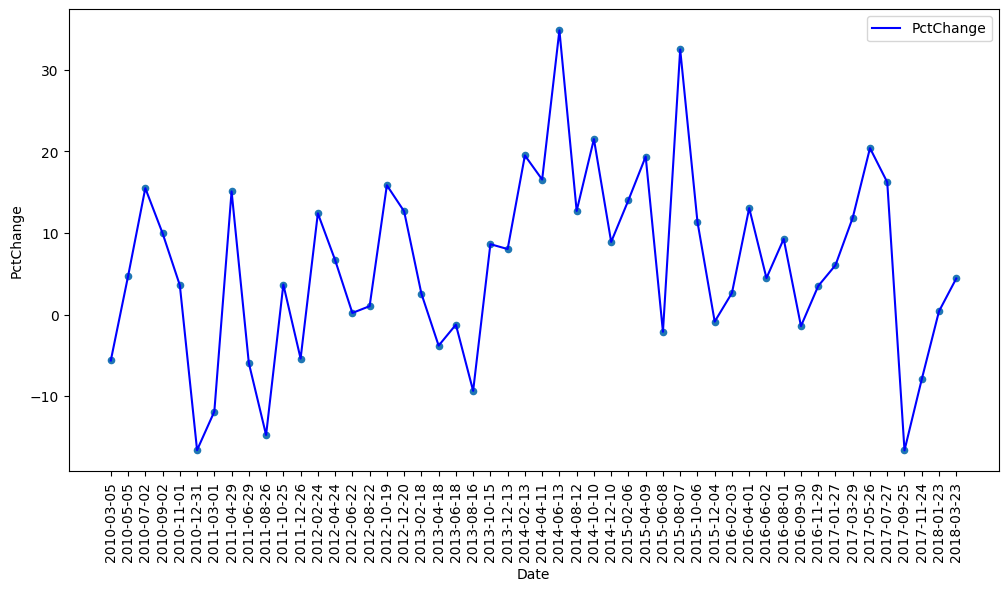

In [29]:
# plt.plot(data=portfolio)
ax = portfolio.plot(x="Date", y="PctChange", kind="scatter", figsize=[12,6], style='b', rot=90)
portfolio.plot(x="Date", y="PctChange", kind="line", ax=ax, style='b', rot=90)

In [30]:
nfity = pd.read_csv("nfity.csv")

In [31]:
nfity['Date'] = pd.to_datetime(nfity['Date'])
nfity.set_index('Date', inplace=True)

# Drop columns where every entry is 0.0
nfity = nfity.loc[:, (nfity != 0).any(axis=0)]

# # # Use the column selection to drop columns where less than the threshold number of values are non-zero
threshold = 0.70 * len(nfity)
nfity = nfity.loc[:, (nfity != 0).sum() >= threshold]
nfity = nfity.iloc[::-1]

In [32]:
nfity

,Unnamed: 0,Close
Date,,
2009-01-01,3731,3033.45
2009-01-02,3730,3046.75
2009-01-05,3729,3121.45
2009-01-06,3728,3112.80
2009-01-07,3727,2920.40
...,...,...
2024-01-18,4,21462.25
2024-01-19,3,21622.40
2024-01-20,2,21571.80


In [33]:
from collections import defaultdict
def BackTest_Nifty(nData,startDate, duration):
    window = 2  # month
    print(type(startDate))
    start = datetime.datetime.strptime(startDate, "%Y-%m-%d")
    end = start + datetime.timedelta(days=30*window)

    end_stop_date = start + datetime.timedelta(days=duration)
    x = defaultdict(dict)
    c = 1
    print(type(end))
    print(type(end_stop_date))

    while end < end_stop_date:
        end = start + datetime.timedelta(days=30*window)
        temp = nData.loc[start:end, :]
        # print(temp["Close"])
        print(temp)
        x["nfity"][c] = {
            "date_start": str(temp["Close"].iloc[0:].index[0]),
            "date_end": str(temp["Close"].iloc[-1:].index[0]),
            "st_price": temp["Close"].iloc[0],
            "en_price": temp["Close"].iloc[-1]
        }
        start = end
        c += 1
    return x, c-1

In [34]:
win, total_ = BackTest_Nifty(nfity, "2010-01-05", 3000)

<class 'str'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
            Unnamed: 0    Close
Date                           
2010-01-05        3487  5277.90
2010-01-06        3486  5281.80
2010-01-07        3485  5263.10
2010-01-08        3484  5244.75
2010-01-11        3483  5249.40
2010-01-12        3482  5210.40
2010-01-13        3481  5233.95
2010-01-14        3480  5259.90
2010-01-15        3479  5252.20
2010-01-18        3478  5274.85
2010-01-19        3477  5225.65
2010-01-20        3476  5221.70
2010-01-21        3475  5094.15
2010-01-22        3474  5036.00
2010-01-25        3473  5007.90
2010-01-27        3472  4853.10
2010-01-28        3471  4867.25
2010-01-29        3470  4882.05
2010-02-01        3469  4899.70
2010-02-02        3468  4830.10
2010-02-03        3467  4931.85
2010-02-04        3466  4845.35
2010-02-05        3465  4718.65
2010-02-06        3464  4757.25
2010-02-08        3463  4760.40
2010-02-09        3462  4792.65
2010-02-10        3461  4757.20
20

In [35]:
nfityPercentChange, nfityendDates = PercentChange(win, total_)

In [36]:
nfity_portfolio = pd.DataFrame({
    'Date': nfityendDates,
    'nfityPctChange': nfityPercentChange
})

In [37]:
print(nfity_portfolio)

                   Date  nfityPctChange
0   2010-03-05 00:00:00       -3.584759
1   2010-05-05 00:00:00        0.017564
2   2010-07-02 00:00:00        2.189311
3   2010-09-02 00:00:00        4.779503
4   2010-11-01 00:00:00       11.508982
5   2010-12-31 00:00:00        0.277072
6   2011-03-01 00:00:00       -9.979623
7   2011-04-29 00:00:00        4.114228
8   2011-06-29 00:00:00       -1.768895
9   2011-08-26 00:00:00      -15.224669
10  2011-10-26 00:00:00        5.736239
11  2011-12-26 00:00:00      -10.851195
12  2012-02-24 00:00:00       13.607449
13  2012-04-24 00:00:00       -3.806200
14  2012-06-22 00:00:00       -1.466688
15  2012-08-22 00:00:00        5.830311
16  2012-10-19 00:00:00        5.013994
17  2012-12-20 00:00:00        3.485128
18  2013-02-18 00:00:00       -0.307619
19  2013-04-18 00:00:00       -1.951443
20  2013-06-18 00:00:00       -0.356506
21  2013-08-16 00:00:00       -5.259220
22  2013-10-15 00:00:00       12.453022
23  2013-12-13 00:00:00        2.027010


<Axes: xlabel='Date', ylabel='nfityPctChange'>

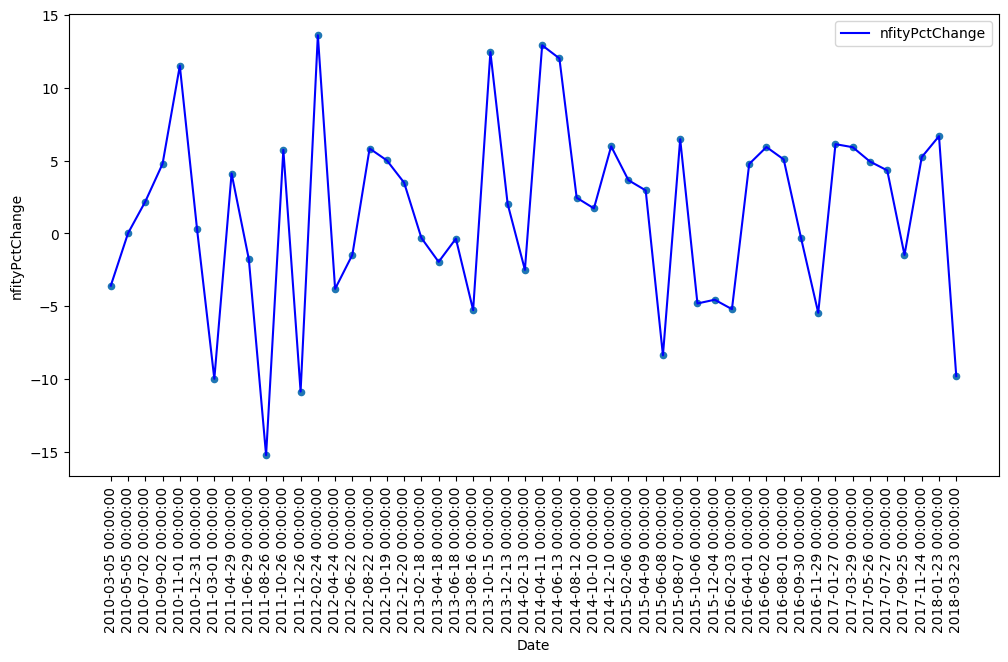

In [38]:
# plt.plot(data=portfolio)
nax = nfity_portfolio.plot(x="Date", y="nfityPctChange", kind="scatter",
                    figsize=[12, 6], style='b', rot=90)
nfity_portfolio.plot(x="Date", y="nfityPctChange", kind="line",
                     ax=nax, style='b', rot=90)

In [39]:
dats = pd.concat([portfolio, nfity_portfolio["nfityPctChange"]], axis=1)

In [40]:
dats

,Date,PctChange,nfityPctChange
0,2010-03-05,-5.622643,-3.584759
1,2010-05-05,4.698279,0.017564
2,2010-07-02,15.496915,2.189311
3,2010-09-02,9.976377,4.779503
4,2010-11-01,3.608046,11.508982
5,2010-12-31,-16.607634,0.277072
6,2011-03-01,-11.881195,-9.979623
7,2011-04-29,15.106948,4.114228
8,2011-06-29,-5.939194,-1.768895
9,2011-08-26,-14.755594,-15.224669


<Axes: xlabel='Date'>

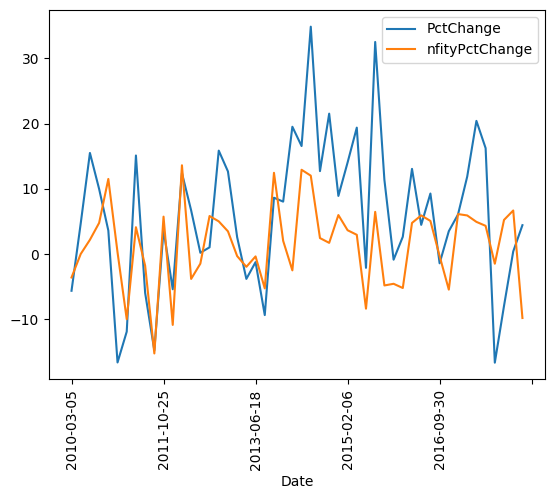

In [41]:
x = dats.plot(x="Date", y="PctChange", kind="line", rot=90)
dats.plot(x="Date", y="nfityPctChange",kind="line", ax=x, rot=90)